In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, r2_score

sns.set_style(style='darkgrid')

In [3]:
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
df.drop('Gender',axis=1, inplace=True)
df.drop('User ID',axis=1, inplace=True)

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


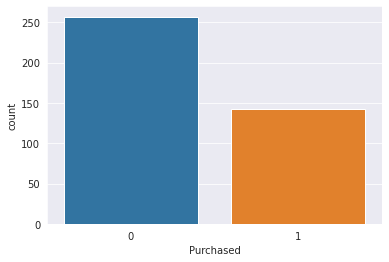

In [7]:
sns.countplot(df['Purchased'])

In [8]:
X= df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logisitic Regression (Extra)

In [11]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_pred = lr.predict(X_test)

In [13]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.85
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120

[[71  2]
 [16 31]]


In [14]:
print(lr.predict(sc.transform([[46,41000]])))

[0]


# SVM

In [15]:
clf = SVC(kernel='linear', random_state=0)
clf.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [16]:
pred =clf.predict(X_test)

In [17]:
print('Accuracy:',accuracy_score(y_test,pred)*100)
print('F1 Score: ',f1_score(y_test,pred))
print('R2_Score: ',r2_score(y_test,pred))

Accuracy: 85.0
F1 Score:  0.7692307692307693
R2_Score:  0.37044593412999127


# SVM (rbf)

In [18]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [22]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [23]:
y_pred = classifier.predict(X_test)

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

# KNN

In [25]:
X = df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
clf = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p=2)
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
print(clf.predict(sc.transform([[30,87000]])))

[0]


In [30]:
y_pred = clf.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix:
 [[69  4]
 [ 4 43]]
Accuracy: 93.33%
